## Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

### Step 1 - read dataset

In [3]:
df = pd.read_csv('AirPassengers.csv' , index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Step 2 - Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.isna().sum()

Passengers    0
dtype: int64

### Visualize Time Series

![Screenshot 2024-05-26 at 9.43.10 PM.png](<attachment:Screenshot 2024-05-26 at 9.43.10 PM.png>)
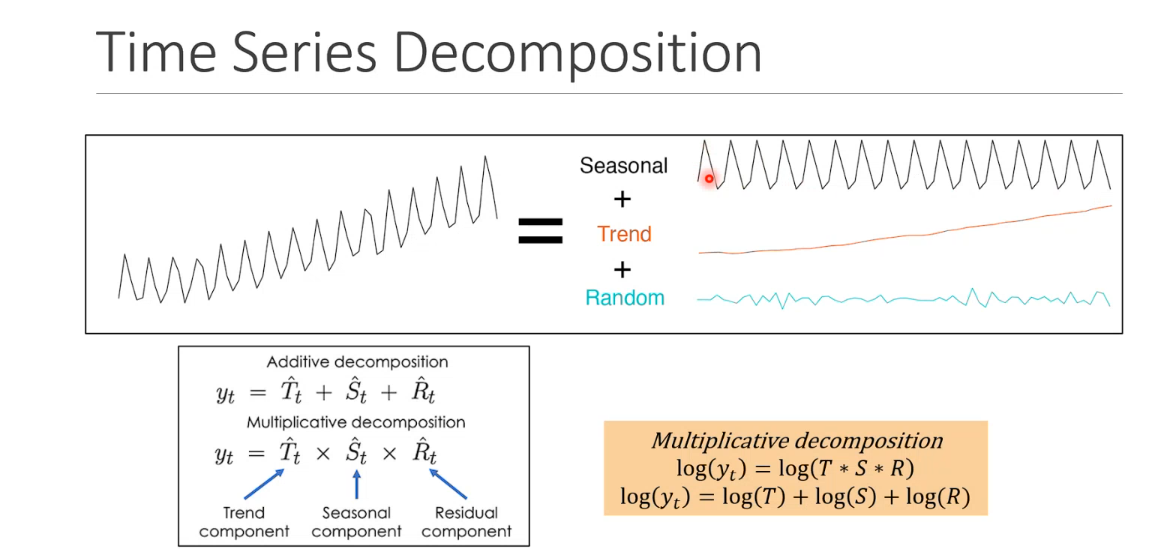

In [6]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


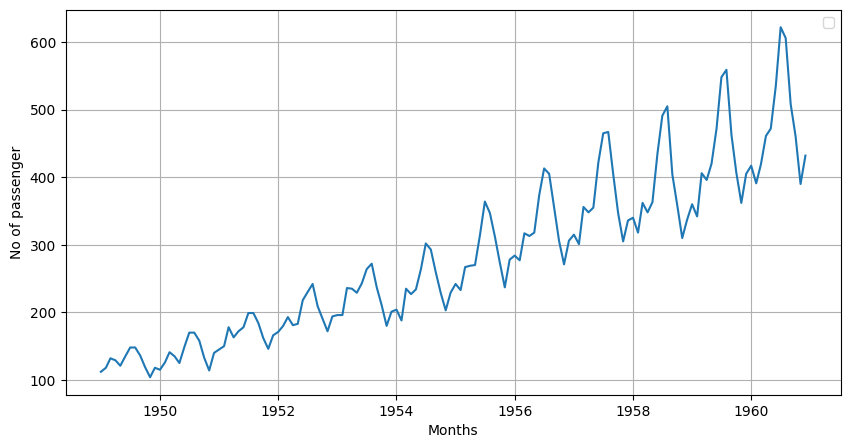

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'])
plt.xlabel('Months')
plt.ylabel('No of passenger')
plt.grid()
plt.legend()
plt.show()

![Screenshot 2024-05-26 at 9.44.26 PM.png](<attachment:Screenshot 2024-05-26 at 9.44.26 PM.png>)
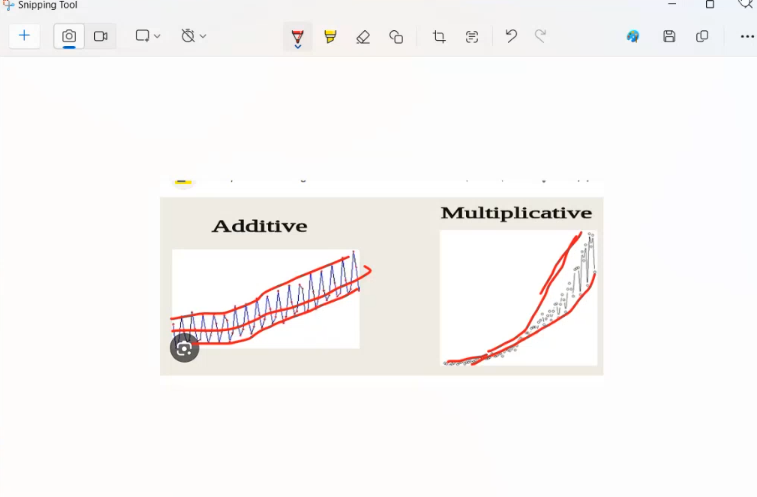

Decompose the time series - Multiplicative model

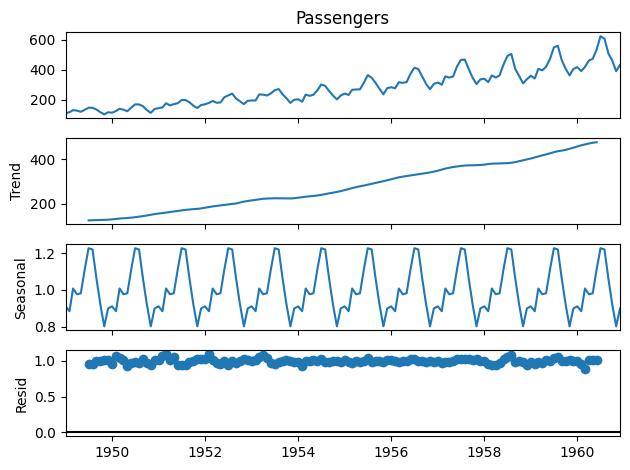

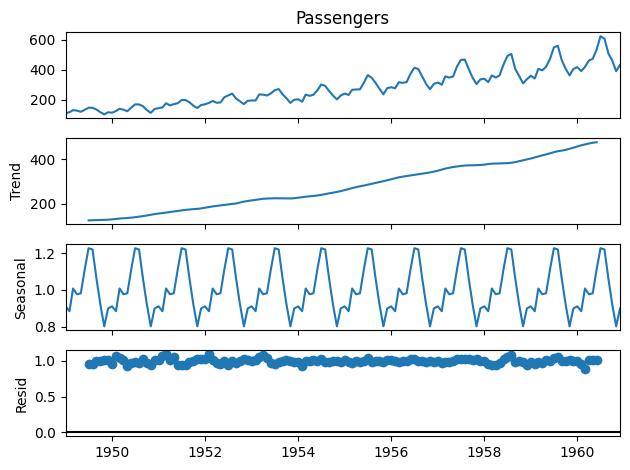

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(x=df['Passengers'], model='multiplicative')
Q.plot()

### Plot the trend

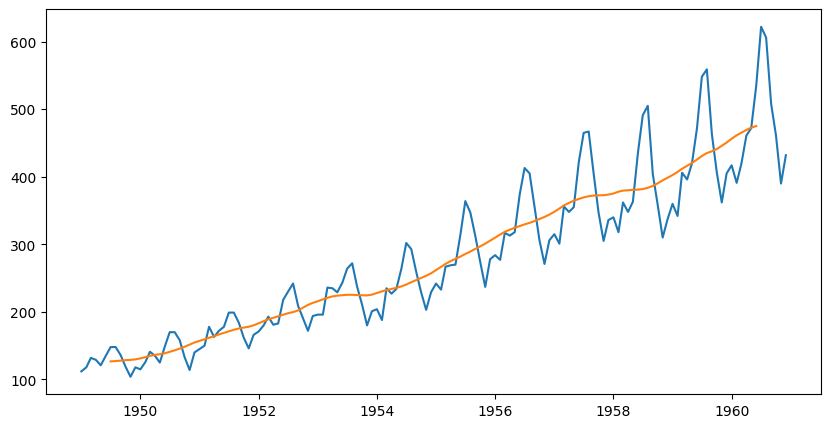

In [9]:
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'])
plt.plot(Q.trend)
plt.show()

### Plot the seasonal

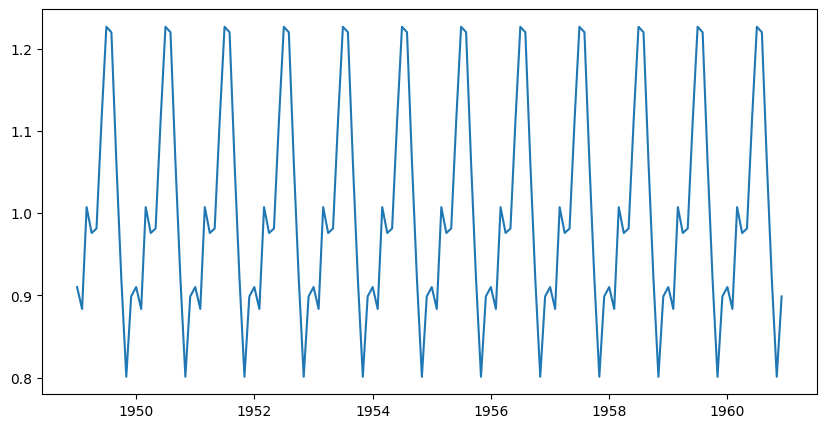

In [10]:
plt.figure(figsize=(10,5))
plt.plot(Q.seasonal)
plt.show()

### Plot the residual

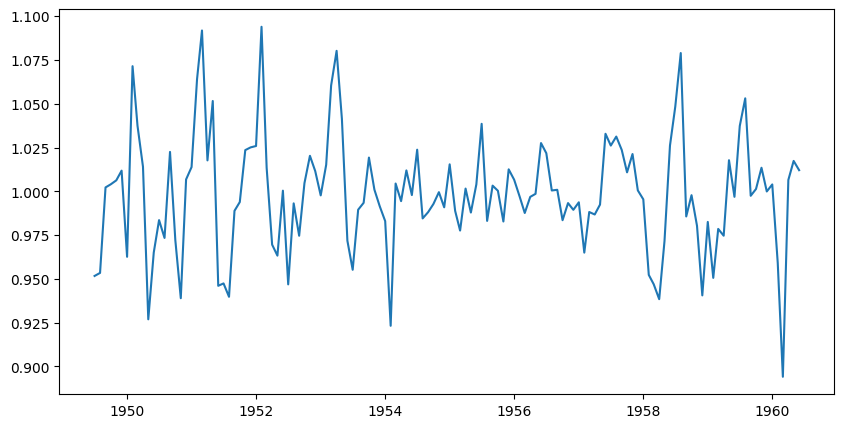

In [11]:
plt.figure(figsize=(10,5))
plt.plot(Q.resid)
plt.show()

## Time Series Forecasting


In [12]:
## Based on current data estimate what 
 ## the Air Passengers for next 4 years 4 years 
## = 4*12 = 48 months



![Screenshot 2024-05-26 at 9.58.08 PM.png](<attachment:Screenshot 2024-05-26 at 9.58.08 PM.png>)
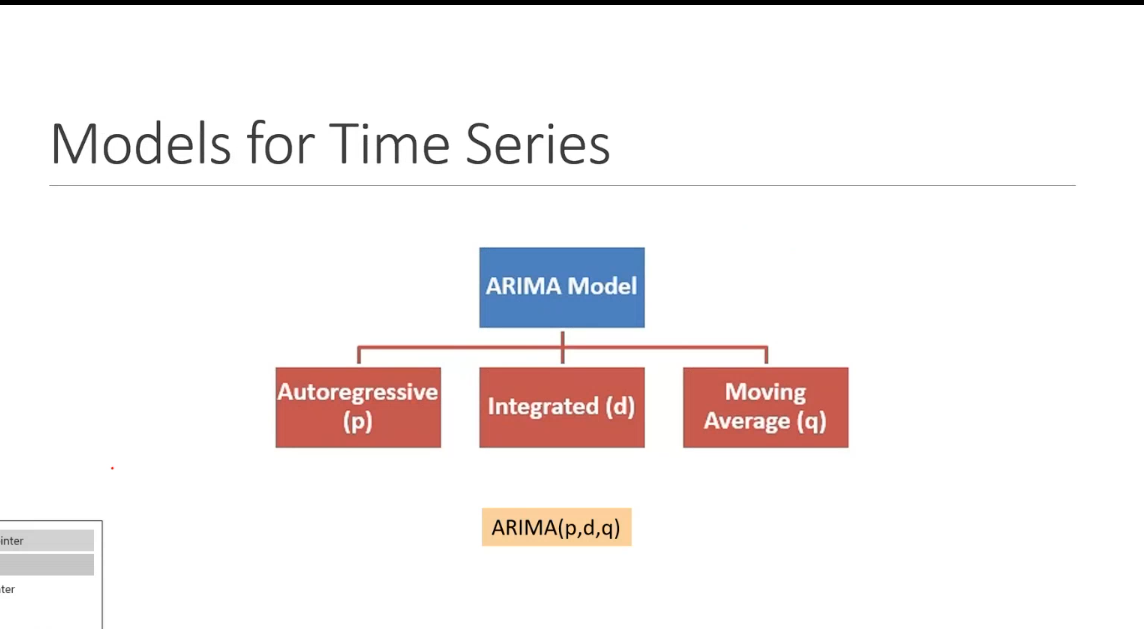

In [13]:
pip install pmdarima

  Using cached pmdarima-2.0.4-cp312-cp312-macosx_10_9_x86_64.whl.metadata (7.8 kB)
  Using cached Cython-3.0.10-cp312-cp312-macosx_10_9_x86_64.whl.metadata (3.2 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4 kB)
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
Using cached pmdarima-2.0.4-cp312-cp312-macosx_10_9_x86_64.whl (666 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 462.1 kB/s eta 0:00:0000:0100:01
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
Using cached urllib3-2.2.1-py3-none-any.whl (121 kB)
Note: you may need to restart the kernel to use updated packages.


#### ARIMA - Auto Regressive Integrated Moving Average

In [14]:
from pmdarima.arima import auto_arima


In [15]:
model = auto_arima (df['Passengers'], m=12, seasonal=True)

In [16]:
model.order

(2, 1, 1)

### Get the forecast for 4 years
3 years = 3*12 month = 48 months



In [17]:
forecast, conf = model.predict(n_periods=48, return_conf_int=True)


In [19]:
forecast

1961-01-01    445.634934
1961-02-01    420.395024
1961-03-01    449.198348
1961-04-01    491.839976
1961-05-01    503.394502
1961-06-01    566.862471
1961-07-01    654.260189
1961-08-01    638.597493
1961-09-01    540.883739
1961-10-01    494.126610
1961-11-01    423.332690
1961-12-01    465.507550
1962-01-01    479.290853
1962-02-01    454.176837
1962-03-01    483.086981
1962-04-01    525.819247
1962-05-01    537.450681
1962-06-01    600.983905
1962-07-01    688.436994
1962-08-01    672.821280
1962-09-01    575.147390
1962-10-01    528.424087
1962-11-01    457.658868
1962-12-01    499.858081
1963-01-01    513.662048
1963-02-01    488.565565
1963-03-01    517.490586
1963-04-01    560.235476
1963-05-01    571.877620
1963-06-01    635.419933
1963-07-01    722.880733
1963-08-01    707.271562
1963-09-01    609.603224
1963-10-01    562.884632
1963-11-01    492.123410
1963-12-01    534.326015
1964-01-01    548.132860
1964-02-01    523.038818
1964-03-01    551.965912
1964-04-01    594.712559


In [21]:
df_forecast = forecast.to_frame()
df_forecast.colums = [['Forecast']]
df_forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [22]:
df_forecast[['lower','upper']]=conf

In [25]:
df_forecast


,0,lower,upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


In [24]:
df_forecast = df_forecast.apply(round)
df_forecast


,0,lower,upper
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


### Save above result to csv


In [26]:
df_forecast.to_csv("Forecast.csv")


Plot above results


KeyError: 'Forecast'

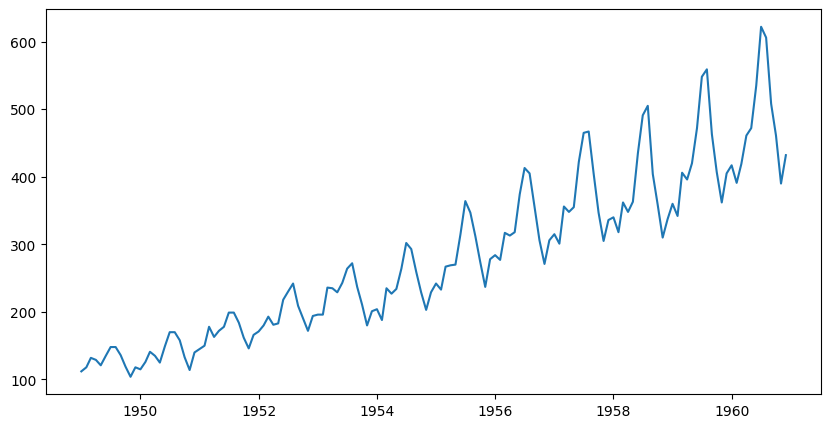

In [28]:
plt.figure(figsize=(10,5))
plt.plot(df['Passengers'], label='Observed')
plt.plot(df_forecast['Forecast'], label='Forecast')
plt.fill_between(x=df_forecast.index, 
                 y1=df_forecast['Lower'], 
                 y2=df_forecast['Upper'], 
                 alpha=0.7, color='gray', label='Confidence interval')
plt.xlabel('Month')
plt.ylabel('Number of Air Passengers')
plt.title('Forecast Sheet')
plt.legend()
plt.grid()
plt.show()